## Exam Data Analysis & Prediction

Dataset Overview: This dataset pertains to the examination results of students who participated in a series of academic assessments at a fictitious educational institution named "University of Exampleville." The assessments were administered across various courses and academic levels, with a focus on evaluating students' performance in general management and domain-specific topics.

Columns: The dataset comprises 12 columns, each representing specific attributes and performance indicators of the students. These columns encompass information such as the students' names (which have been anonymized), their respective universities, academic program names (including BBA and MBA), specializations, the semester of the assessment, the type of examination domain (general management or domain-specific), general management scores (out of 50), domain-specific scores (out of 50), total scores (out of 100), student ranks, and percentiles.

Data Collection: The examination data was collected during a standardized assessment process conducted by the University of Exampleville. The exams were designed to assess students' knowledge and skills in general management and their chosen domain-specific subjects. It involved students from both BBA and MBA programs who were in their final year of study.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,ridge_regression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import pickle

sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(10,7)})
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/Exam data.csv')

In [ ]:
df.head()

,Unnamed: 0,NAME OF THE STUDENT,UNIVERSITY,PROGRAM NAME,Specialisation,SEMESTER,Domain,GENERAL MANAGEMENT SCORE (OUT of 50),Domain Specific SCORE (OUT 50),TOTAL SCORE (OUT of 100),RANK,PERCENTILE
0,0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510


In [ ]:
df.shape

(151, 12)

### We dont require Unnamed: 0 so we will remove it

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

Change tha all columns name into lower case

In [ ]:
column_names=df.columns

In [ ]:
def lower(columns):
    lower_case=[column.lower() for column in columns]
    return lower_case

In [ ]:
column_names_lower=lower(column_names)
column_mapping=dict(zip(column_names,column_names_lower))
df=df.rename(columns=column_mapping)

In [ ]:
df.head()

,name of the student,university,program name,specialisation,semester,domain,general management score (out of 50),domain specific score (out 50),total score (out of 100),rank,percentile
0,Camila Wood,"Stanford University, USA",B.Com,Honours,5th,Finance,50,50,100,1,1.000000
1,Alexander Thompson,"Stanford University, USA",B.Com,Financial Services,5th,Finance,50,50,100,2,0.993377
2,Liam Taylor,"Harvard University, USA",B.Com,Accounting Analytics,5th,BA,50,50,100,3,0.986755
3,Evelyn Jenkins,"Stanford University, USA",B.Com,Honours,5th,Finance,49,50,99,4,0.980132
4,Michael Jackson,"Harvard University, USA",MBA,International Business,3rd,IB,50,49,99,5,0.973510


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   name of the student                   151 non-null    object 
 1   university                            151 non-null    object 
 2   program name                          151 non-null    object 
 3   specialisation                        151 non-null    object 
 4   semester                              151 non-null    object 
 5   domain                                151 non-null    object 
 6   general management score (out of 50)  151 non-null    int64  
 7   domain specific score (out 50)        151 non-null    int64  
 8   total score (out of 100)              151 non-null    int64  
 9   rank                                  151 non-null    int64  
 10  percentile                            151 non-null    float64
dtypes: float64(1), int6

In [ ]:
df.shape

(151, 11)

In [ ]:
df.isna().sum()

name of the student                     0
university                              0
program name                            0
specialisation                          0
semester                                0
domain                                  0
general management score (out of 50)    0
domain specific score (out 50)          0
total score (out of 100)                0
rank                                    0
percentile                              0
dtype: int64

In [ ]:
df.describe()

,general management score (out of 50),domain specific score (out 50),total score (out of 100),rank,percentile
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,37.993377,33.635762,71.629139,76.000000,0.503311
std,10.734056,11.866751,21.200823,43.734045,0.289629
min,4.000000,1.000000,5.000000,1.000000,0.006623
25%,32.500000,27.000000,62.000000,38.500000,0.254967
50%,40.000000,36.000000,74.000000,76.000000,0.503311
75%,47.000000,43.000000,89.000000,113.500000,0.751656
max,50.000000,50.000000,100.000000,151.000000,1.000000


### We are now going to use a bar plot visualization to compare the distribution of various aspects within a university

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Stanford University, USA'),
  Text(1, 0, 'Harvard University, USA'),
  Text(2, 0, 'University of Oxford, UK'),
  Text(3, 0, 'University of Cambridge, UK'),
  Text(4, 0, 'Massachusetts Institute of Technology (MIT), USA'),
  Text(5, 0, 'California Institute of Technology (Caltech), USA'),
  Text(6, 0, 'Imperial College London, UK')])

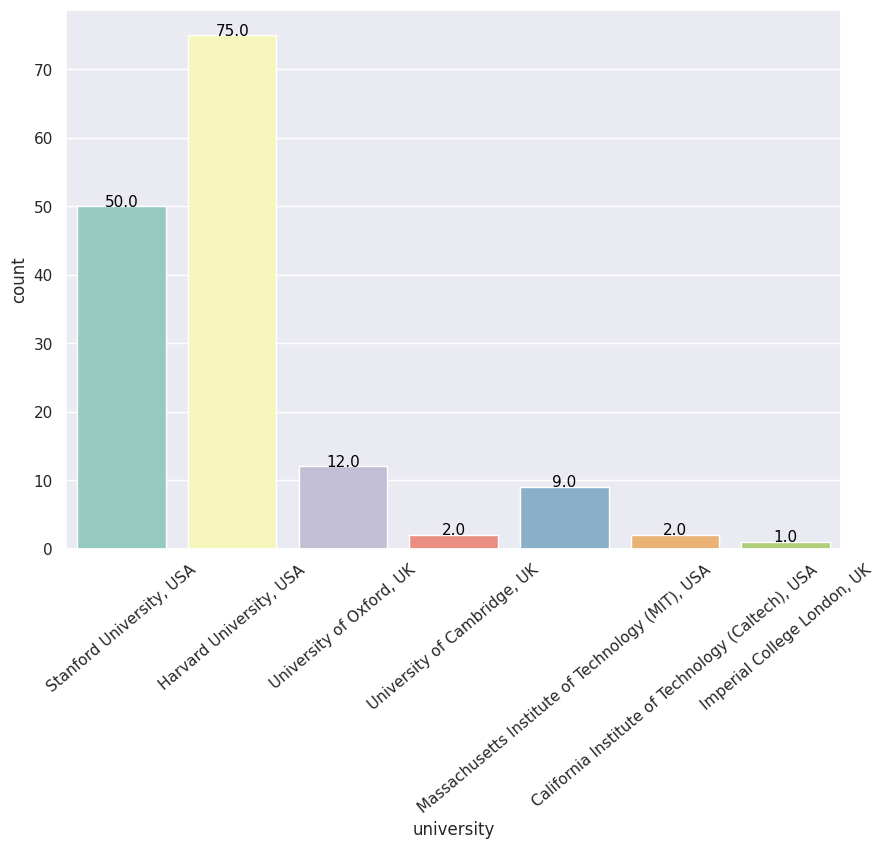

In [ ]:
ax=sns.countplot(data=df,x='university',palette='Set3')
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='baseline', fontsize=11, color='black')

plt.xticks(rotation=40)


## Now we are going to exploring general management score (out of 50)

Text(0, 0.5, 'frequency')

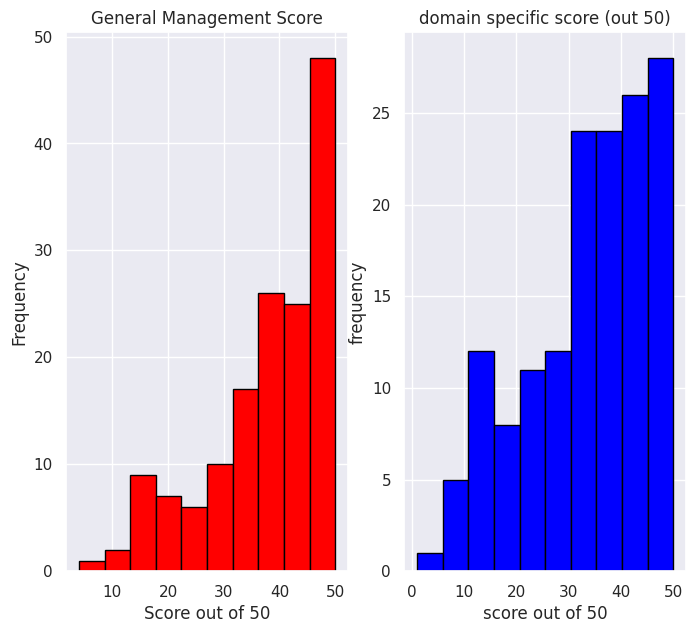

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(8,7))
axs[0].hist(df['general management score (out of 50)'], bins=10, color='red', edgecolor='black')
axs[0].set_title('General Management Score')
axs[0].set_xlabel('Score out of 50')
axs[0].set_ylabel('Frequency')


axs[1].hist(df['domain specific score (out 50)'],bins=10,color='blue',edgecolor='black')
axs[1].set_title('domain specific score (out 50)')
axs[1].set_xlabel('score out of 50')
axs[1].set_ylabel('frequency')


### Stacked bar chart for university and specialisation

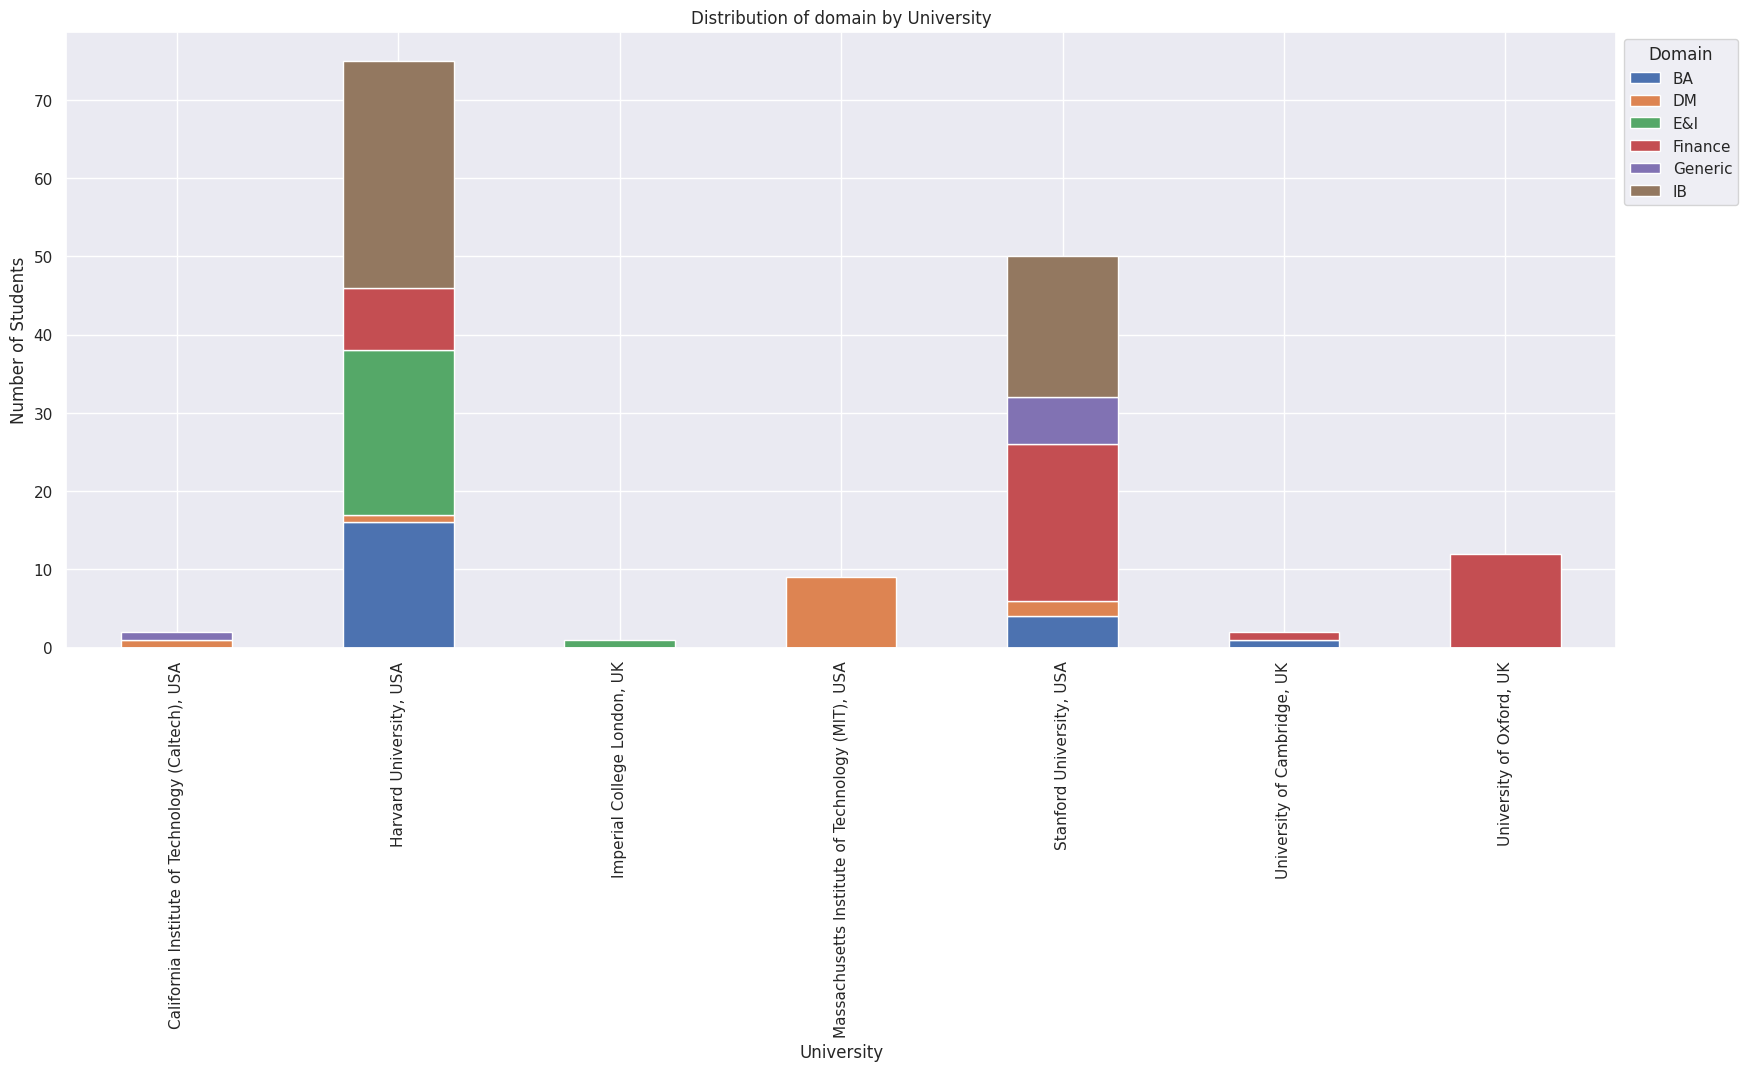

In [ ]:
university_domain=df.groupby(['university', 'domain']).size().unstack(fill_value=0)
ax=university_domain.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('University')
plt.ylabel('Number of Students')
plt.title('Distribution of domain by University')
plt.legend(title='Domain', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()

## Domain wise Average Total Score,Average Domain Specific Score,Average General Score

In [ ]:
avg_Average_Total_Score=df.groupby('domain')['domain specific score (out 50)'].mean()
avg_general_management_score=df.groupby('domain')['general management score (out of 50)'].mean()

In [ ]:
avg_total_score=df.groupby('domain')['total score (out of 100)'].mean()

In [ ]:
avg_total_score.values

array([80.0952381 , 65.92307692, 68.27272727, 73.43902439, 61.71428571,
       70.89361702])

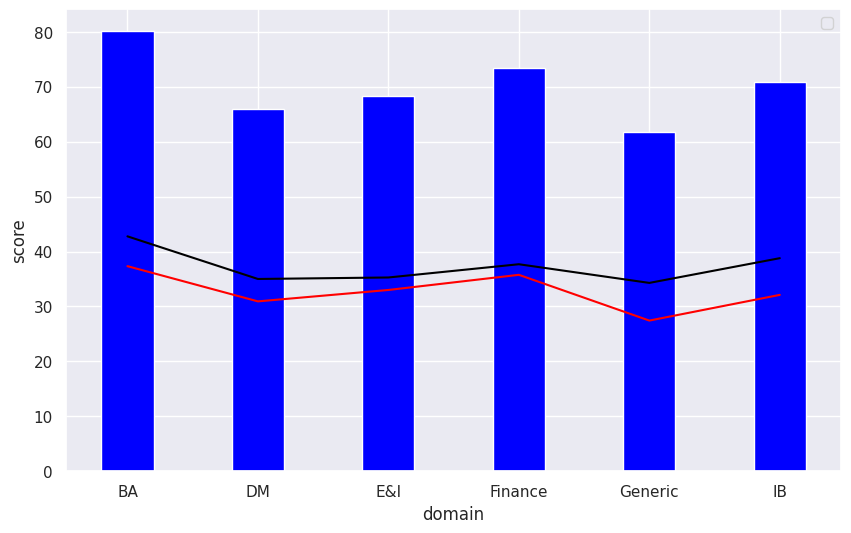

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
ax.bar(avg_total_score.index,avg_total_score.values,color='blue',width=0.4)
ax.plot(avg_general_management_score.index,avg_general_management_score.values,color='black')
ax.plot(avg_Average_Total_Score.index,avg_Average_Total_Score.values,color='red')
plt.xlabel('domain')
plt.ylabel('score')
plt.legend()
plt.show()

## Distribution of Students

In [ ]:
students=df.domain.value_counts()

([<matplotlib.patches.Wedge at 0x7d5c22aeca30>,
 [Text(0.6146904789718362, 0.9122256382394516, 'IB'),
  Text(-1.039614278050285, 0.35944700982757494, 'Finance'),
  Text(-0.614690478971836, -0.9122256382394517, 'E&I'),
  Text(0.3268331664678015, -1.0503237983101357, 'BA'),
  Text(0.9309615253067394, -0.585927161342218, 'DM'),
  Text(1.0883550774398403, -0.15963466231028642, 'Generic')],
 [Text(0.3352857158028197, 0.4975776208578826, '31.1%'),
  Text(-0.5670623334819735, 0.19606200536049542, '27.2%'),
  Text(-0.33528571580281963, -0.4975776208578827, '14.6%'),
  Text(0.1782726362551644, -0.5729038899873466, '13.9%'),
  Text(0.5077971956218578, -0.3195966334593916, '8.6%'),
  Text(0.5936482240580947, -0.08707345216924713, '4.6%')])

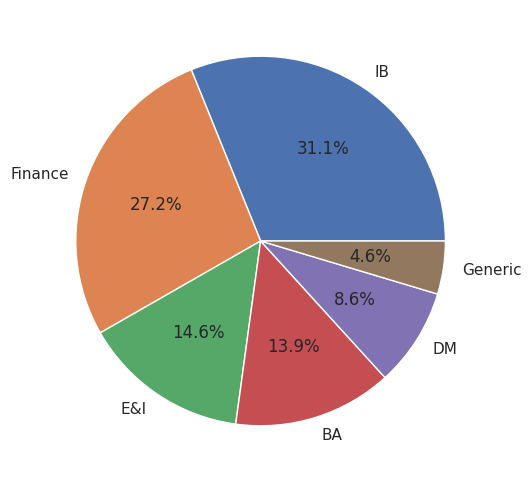

In [ ]:
fid,ax=plt.subplots(figsize=(10,6))
ax.pie(students,autopct='%1.1f%%',labels=students.index)

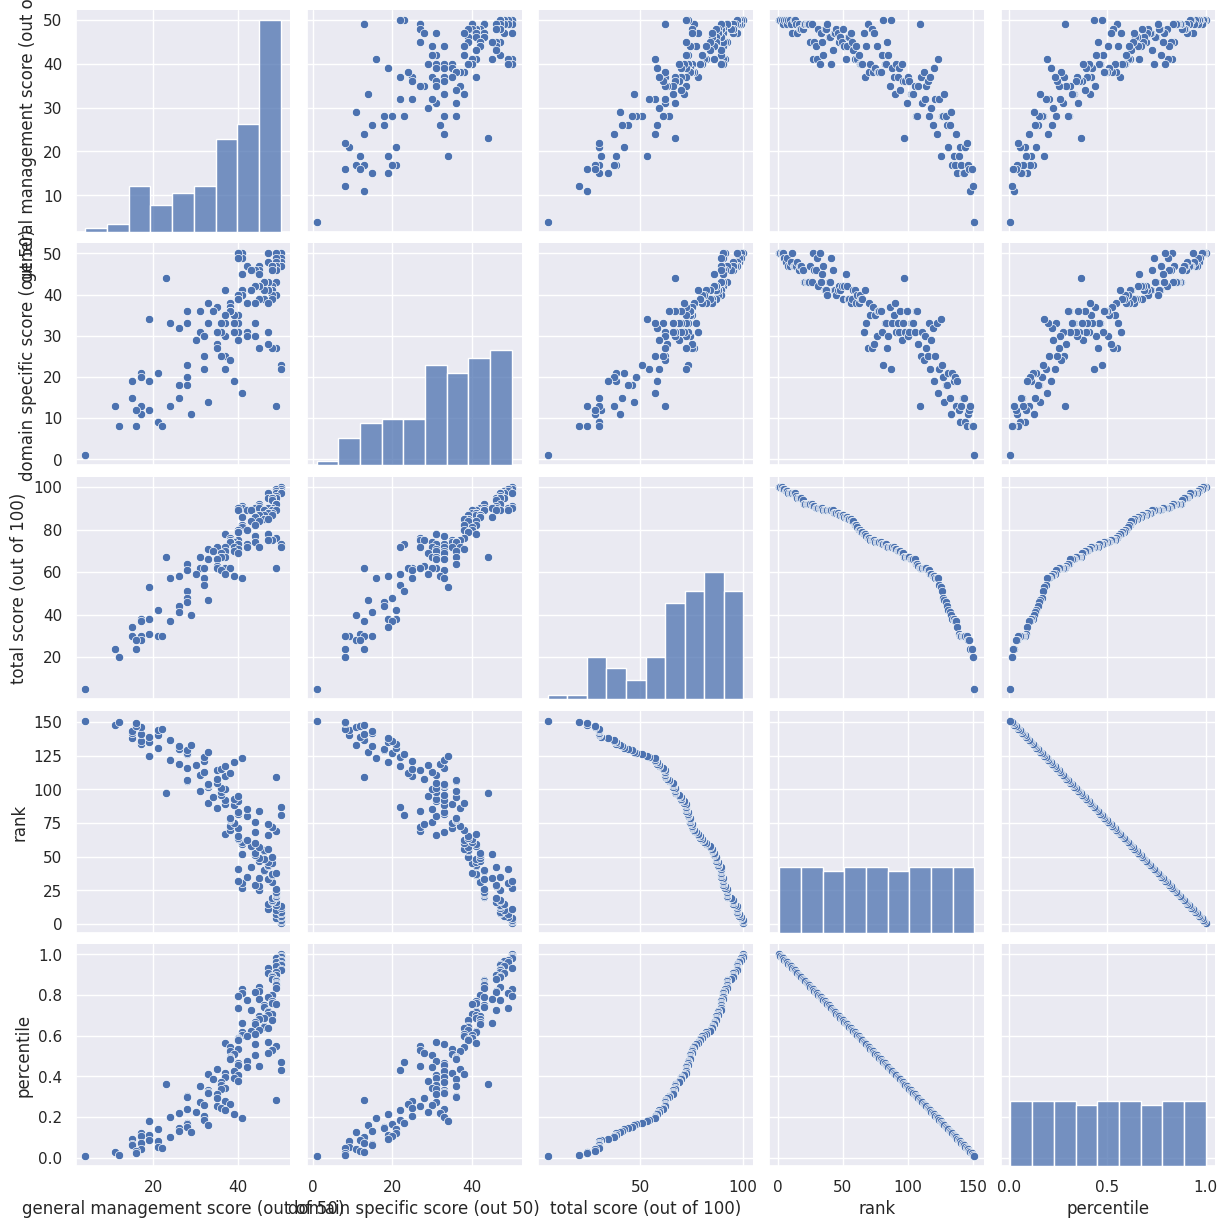

In [ ]:
sns.pairplot(df)

In [ ]:
columns=df.select_dtypes(['object']).columns
columns

Index(['name of the student', 'university', 'program name', 'specialisation',
       'semester', 'domain'],
      dtype='object')

In [ ]:
#ordinal encoding
oec=OrdinalEncoder()
df[columns]=oec.fit_transform(df[columns])

In [ ]:
df.head()

,name of the student,university,program name,specialisation,semester,domain,general management score (out of 50),domain specific score (out 50),total score (out of 100),rank,percentile
0,29.0,4.0,0.0,10.0,1.0,3.0,50,50,100,1,1.000000
1,8.0,4.0,0.0,8.0,1.0,3.0,50,50,100,2,0.993377
2,93.0,1.0,0.0,1.0,1.0,0.0,50,50,100,3,0.986755
3,60.0,4.0,0.0,10.0,1.0,3.0,49,50,99,4,0.980132
4,115.0,1.0,3.0,13.0,0.0,5.0,50,49,99,5,0.973510


In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 10), (31, 10), (120,), (31,))

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
#Random Forest
def ML_model(algo):
    model=algo.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    #training score
    train_score=model.score(X_train,y_train)

    #testing score
    test_score=model.score(X_test,y_test)

    #r2_score
    score_r2=r2_score(y_test,y_pred)

    #Mse
    mse_score=mean_squared_error(y_test,y_pred)

    print(f"\nTraining Score : {train_score} \nTesting score :{test_score}")

    print(f"MSE : {mse_score}\nAccuracy_Scores_R2 {score_r2}")

    return model


In [ ]:
Rf_model=ML_model(RandomForestRegressor())


Training Score : 0.9998866311825693 
Testing score :0.999373568578444
MSE : 5.3127693155987924e-05
Accuracy_Scores_R2 0.999373568578444


In [ ]:
GB_model=ML_model(GradientBoostingRegressor(learning_rate=0.6))


Training Score : 0.9999999829941567 
Testing score :0.9940059290973083
MSE : 0.0005083575770870352
Accuracy_Scores_R2 0.9940059290973083


In [ ]:
#save model
file_name='best_model.pkl'

with open(file_name,'wb') as F:
    pickle.dump(Rf_model,F)


In [ ]:
#load model
with open('/content/best_model.pkl' ,'rb') as F:
    load_model=pickle.load(F)


In [ ]:
load_model.predict(X_test)

array([0.49735099, 0.88735099, 0.46649007, 0.46966887, 0.05284768,
       0.78529801, 0.49317881, 0.57741722, 0.64649007, 0.42635762,
       0.71245033, 0.93304636, 0.76569536, 0.93847682, 0.86192053,
       0.08688742, 0.24596026, 0.03582781, 0.62629139, 0.10642384,
       0.81039735, 0.44311258, 0.82450331, 0.12668874, 0.17675497,
       0.07086093, 0.26927152, 0.56331126, 0.34397351, 0.80748344,
       0.84403974])